# U.S. Medical Insurance Costs

(Completed as a project for CodeAcademy)

In this project, I will find key statistics for a spreadsheet that contains patient data. The available data is age, sex, bmi, children, smoker status, location, and charges.

Outline:

1. Key statistics for:
    1. Age
    1. Make a function
    1. Sex
    1. BMI
    1. Number of Children
    1. Smoker Status
    1. Location
    1. Charges
2. Average charges and statistical differences for subcategories in:
    1. Age
    1. Sex
    1. BMI
    1. Number of Children
    1. Smoker Status
    1. Location

## 1a. Key Statistics for Age
Since age is a continuous variable, statistics like mean, median, mode, range, quartiles, etc. can be found.
The first step is to collect the data from the CSV. For this, I will use the pandas module. I will also print out the parsed csv to make sure that it works. 

In [1]:
import pandas as pd
insurance_file=pd.read_csv(r'C:\Users\User\Desktop\us med cost final\python-portfolio-project-starter-files\insurance.csv')
print(insurance_file)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Now, I will extract data just for the age column.

In [2]:
ages=pd.DataFrame(insurance_file, columns=['age'])
print(ages)

      age
0      19
1      18
2      28
3      33
4      32
...   ...
1333   50
1334   18
1335   18
1336   21
1337   61

[1338 rows x 1 columns]


While we are at it, lets separate the columns into individual arrays.

In [3]:
sex=pd.DataFrame(insurance_file, columns=['sex'])
bmi=pd.DataFrame(insurance_file, columns=['bmi'])
children=pd.DataFrame(insurance_file, columns=['children'])
smoker=pd.DataFrame(insurance_file, columns=['smoker'])
region=pd.DataFrame(insurance_file, columns=['region'])
charges=pd.DataFrame(insurance_file, columns=['charges'])

Now, I will take the mean, median, mode, range, min, max, standard deviation, and the quartiles. I will use numpy and scipy to get the statistics. I will use matplotlib to plot a box and whiskers plot.


The average age is 39. 
 
The median age is 39.0. 

The most common age is 18. 

The range of ages is 46. 

The youngest person in the data set is 18 years old. 

The oldest person in the data set is 64 years old. 

The standard deviation in ages is 14.044709038954522. 

The 1st quartile is 27.0. 

The 3rd quartile is 51.0.


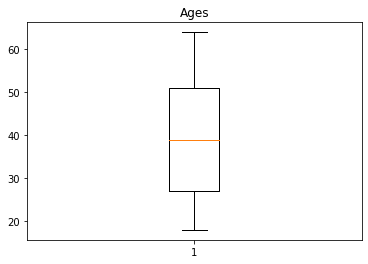

In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#Box and whiskers plot
fig1, ax1=plt.subplots()
ax1.set_title('Ages')
ax1.boxplot(ages)
#Mean
ages_mean=np.average(ages)
ages_mean=int(ages_mean.round())
#Median
ages_median=np.median(ages)
#Mode
ages_mode=stats.mode(ages)
ages_mode=int(ages_mode[0])
#Range
ages_range=np.ptp(ages)
#Min
ages_min=np.amin(ages)
#Max
ages_max=np.amax(ages)
#Standard Deviation
ages_stddev=np.std(ages)
#1st Quartile
ages_1st_quartile=np.quantile(ages,.25)
#3rd Quartile
ages_3rd_quartile=np.quantile(ages,.75)
print('''
The average age is {}. \n 
The median age is {}. \n
The most common age is {}. \n
The range of ages is {}. \n
The youngest person in the data set is {} years old. \n
The oldest person in the data set is {} years old. \n
The standard deviation in ages is {}. \n
The 1st quartile is {}. \n
The 3rd quartile is {}.'''.format(ages_mean,ages_median,ages_mode,ages_range,int(ages_min),int(ages_max),float(ages_stddev),ages_1st_quartile,ages_3rd_quartile))

## 1b: Make a function
Looking back, I realized that the previous can be done using a function.
First, I need to determine the type of data. For example, I cannot find the "average" sex (I would not really understand what .5 sex might be), and the range of sex would be a fairly meaningless statistic.

In [5]:
#Function to find stats for a continuous variable (e.g. age, BMI)
def continuous_stats(data,name):
    fig1, ax1=plt.subplots()
    ax1.set_title(name)
    ax1.boxplot(data)
    #Mean
    mean=np.average(data)
    mean=int(mean.round())
    #Median
    median=np.median(data)
    #Mode
    mode=stats.mode(data)
    mode=int(mode[0])
    #Range
    ranges=np.ptp(data)
    #Min
    minimum=np.amin(data)
    #Max
    maximum=np.amax(data)
    #Std. Dev
    stddev=np.std(data)
    #1st Q
    first_quartile=np.quantile(data,.25)
    #3rd Q
    third_quartile=np.quantile(data,.75)
    return '''The statistics for this data set named "{}" is: \n
    Mean:{} \n
    Median:{} \n
    Mode: {} \n
    Range:{} \n
    Min:{} \n
    Max:{} \n
    Standard Deviation:{} \n
    1st Quartile:{} \n
    3rd Quartile:{}'''.format(name,float(mean),float(median),float(mode),float(ranges),float(minimum),float(maximum),float(stddev),float(first_quartile),float(third_quartile))

#Function to find stats for a discrete variable (e.g. region, sex)
def discrete_stats(data,name):
    #All Options
    unique_entries=np.unique(data,return_counts=True)
    labels=unique_entries[0]
    counts=unique_entries[1]
    count=0
    string=""
    while count+1 <=len(labels):
        string=string+str(labels[count])+": "+str(counts[count])+"\n"
        count=count+1
    #Mode
    mode_of_data=stats.mode(data)
    #Percent
    total_entries=len(data)
    return '''The statistics for this data set named "{}" is: \n
    All Options and their counts:\n
    {} \n
    Mode: {} \n
    Total Entries: {}\n'''.format(str(name),str(string),(mode_of_data[0][0][0]),total_entries)
    
#A function that can tell which of the above functions to use. 
def key_statistics(d,n):
    data_points=np.unique(d)
    point=data_points[0]
    if isinstance(point,np.int64):
        print(continuous_stats(d,n))
    elif isinstance(point,np.float64):
        print(continuous_stats(d,n))
    elif isinstance(point,str):
        print(discrete_stats(d,n))
        

## 1c: Sex
Here I will use the above function to get key statistics for sex.

In [6]:
key_statistics(sex,"Sex")

The statistics for this data set named "Sex" is: 

    All Options and their counts:

    female: 662
male: 676
 

    Mode: male 

    Total Entries: 1338



From the data above, I can calculate the proportion of each sex in the data set.

In [7]:
print(f'''The proportion of people who are of the female sex are roughly {round((662*100)/1338,2)}%.''')
print(f'''The proportion of people who are of the male sex are roughly {round((676*100)/1338,2)}%.''')

The proportion of people who are of the female sex are roughly 49.48%.
The proportion of people who are of the male sex are roughly 50.52%.


## 1d: BMI
Here, I will use the above function to get key statistics for BMI.

The statistics for this data set named "BMI" is: 

    Mean:31.0 

    Median:30.4 

    Mode: 32.0 

    Range:37.17 

    Min:15.96 

    Max:53.13 

    Standard Deviation:6.0959076415894256 

    1st Quartile:26.29625 

    3rd Quartile:34.69375


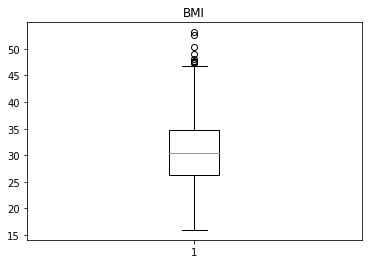

In [8]:
key_statistics(bmi,"BMI")

According to the CDC, the following are the brackets for the different levels of BMI for adults:
1. <18.5=Underweight
1. 18.5~24.9=Normal weight
1. 25~29.9=Overweight
1. Greater than or equal to 30=Obese"

Using the above data, I can quantify how many people are in each bracket, and what % are in each bracket.

In [9]:
underweight, normalweight, overweight, obese=0,0,0,0
bmi_list=bmi.values.tolist()
total_people=len(bmi_list)
for element in bmi_list:
    if element[0]<=18.5:
        underweight+=1
    elif element[0]>18.5 and element[0]<=25.0:
        normalweight+=1
    elif element[0]>25 and element[0]<=30.0:
        overweight+=1
    elif element[0]>30.0:
        obese+=1
print(f'''The number of underweight people is {underweight}.\nThe number of people with a healthy weight is {normalweight}. \nThe number of overweight people is {overweight}.
The number of obese people is {obese}.\n\nThe percentage of people who are underweight is roughly {round((underweight*100)/total_people)}%.\nThe percentage of people with a healthy weight is roughly {round((normalweight*100)/total_people)}%.\nThe percentage of people who are overweight is roughly {round((overweight*100)/total_people)}%.\nThe percentage of people who are obese is roughly {round((obese*100)/total_people)}%.''')

The number of underweight people is 21.
The number of people with a healthy weight is 226. 
The number of overweight people is 386.
The number of obese people is 705.

The percentage of people who are underweight is roughly 2%.
The percentage of people with a healthy weight is roughly 17%.
The percentage of people who are overweight is roughly 29%.
The percentage of people who are obese is roughly 53%.


## 1e: Number of Children
Here, I will use the function in 1c to gain key statistics for the number of children.

The statistics for this data set named "Number of Children" is: 

    Mean:1.0 

    Median:1.0 

    Mode: 0.0 

    Range:5.0 

    Min:0.0 

    Max:5.0 

    Standard Deviation:1.2050421724928497 

    1st Quartile:0.0 

    3rd Quartile:2.0


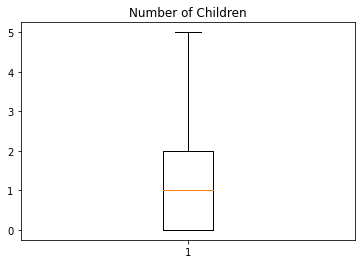

In [10]:
key_statistics(children,"Number of Children")

## 1f: Smoker Status
Here, I will gain key statistics for smoking status.
(Pro tip: Don't smoke!)

In [11]:
key_statistics(smoker,"Smoker Status")

The statistics for this data set named "Smoker Status" is: 

    All Options and their counts:

    no: 1064
yes: 274
 

    Mode: no 

    Total Entries: 1338



Using the data above, I can calculate the percentages of people who smoke and don't smoke (seriously, don't smoke!).

In [12]:
print(f'''The percentage of people who smoke in the data set is roughly {round(((274*100)/1338),2)}%.''')
print(f'''The percentage of people who don't smoke in the data set is roughly {round(((1064*100)/1338),2)}%.''')

The percentage of people who smoke in the data set is roughly 20.48%.
The percentage of people who don't smoke in the data set is roughly 79.52%.


## 1g: Location
Here, I will gain key statistics for where patients are located.

In [13]:
key_statistics(region,"Region")

The statistics for this data set named "Region" is: 

    All Options and their counts:

    northeast: 324
northwest: 325
southeast: 364
southwest: 325
 

    Mode: southeast 

    Total Entries: 1338



Using the data above, I can calculate the percentages of people who live in each region.

In [14]:
print('''In the data set:''')
print(f'''The portion of people who live in the northeast is roughly {round((324*100)/1338,2)}%.''')
print(f'''The portion of people who live in the northwest is roughly {round((325*100)/1338,2)}%.''')
print(f'''The portion of people who live in the southeast is roughly {round((364*100)/1338,2)}%.''')
print(f'''The portion of people who live in the southwest is roughly {round((325*100)/1338,2)}%.''')

In the data set:
The portion of people who live in the northeast is roughly 24.22%.
The portion of people who live in the northwest is roughly 24.29%.
The portion of people who live in the southeast is roughly 27.2%.
The portion of people who live in the southwest is roughly 24.29%.


From the above data, it looks like the proportion of people who live in each region is roughly the same.

## 1h: Charges
Here, I will gain key statistics for where patients are located. 

The statistics for this data set named "Insurance Charges" is: 

    Mean:13270.0 

    Median:9382.033 

    Mode: 1639.0 

    Range:62648.554110000005 

    Min:1121.8739 

    Max:63770.42801 

    Standard Deviation:12105.484975561612 

    1st Quartile:4740.28715 

    3rd Quartile:16639.912515


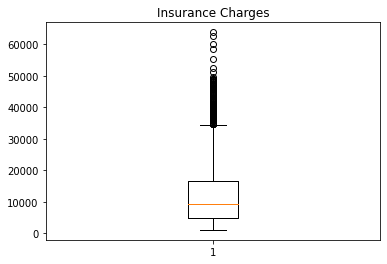

In [15]:
key_statistics(charges,"Insurance Charges")

Based on the box-and-whiskers plot above, it looks like a significant portion of people are paying a lot for insurance. 

## 2a: Difference in Insurance Costs Based on Age Brackets
Here, I will examine the differences between insurance charges based on age brackets. For example, I can figure out whether younger people are paying more for insurance than senior citizens.
First, I will sort the data into age brackets. Then, I will find the average cost for each group. I will use the following brackets:
1. Adult: 18~35
2. Middle Age: 36~55
3. Senior: 56+

In [16]:
import statistics
import scipy as scipy
age_cost_subset=insurance_file[['age','charges']]
age_cost_tuples=[tuple(x) for x in age_cost_subset.to_numpy()]
adult=[]
middle=[]
senior=[]
for items in age_cost_tuples:
    if items[0]>=18 and items[0]<35:
        adult.append(items)
    elif items[0]>=35 and items[0]<55:
        middle.append(items)
    elif items[0]>=55:
        senior.append(items)
adult_costs=[]
for items in adult:
    adult_costs.append(items[1])
adult_cost_average=statistics.mean(adult_costs)
middle_costs=[]
for items in middle:
    middle_costs.append(items[1])
middle_costs_average=statistics.mean(middle_costs)
senior_costs=[]
for items in senior:
    senior_costs.append(items[1])
senior_costs_average=statistics.mean(senior_costs)
print(f'''The average cost for adults is ${round(adult_cost_average,2)}.\nThe average cost of middle aged people is ${round(middle_costs_average,2)}.\nThe average cost for seniors is ${round(senior_costs_average,2)}.''')

The average cost for adults is $9673.32.
The average cost of middle aged people is $14561.17.
The average cost for seniors is $18513.28.


Since I have the costs sorted out by age group, I can use a student's t-test to see whether there is a statistically significant difference in costs among the different age groups. Here, the null hypothesis is that there is NO statistical difference between the cost of insurance for adults and senior citizens. The alternative hypothesis is that there IS a statistical difference between the cost of insurance for adults and senior citizens. The alpha value will be 0.05.

In [17]:
print(scipy.stats.ttest_ind(adult_costs,senior_costs))

Ttest_indResult(statistic=-9.927260660693449, pvalue=5.76701107123396e-22)


Since the p-value is less than 0.05, I can reject the null hypothesis and say that there is a statistically significant difference between insurance costs for adults and seniors. Here, I will make a function that will allow me to do the above.

In [18]:
def ttest(data1,data2,nullhypo,althypo,alpha_val):
    results=scipy.stats.ttest_ind(data1,data2)
    if results[1]<=alpha_val:
        return(f'''Using the student's t-test, since the p-value is less than or equal to the alpha value {alpha_val}, we can conclude that there is statistically significant evidence to suggest that {althypo}.''')
    elif results[1]>alpha_val:
        return(f'''Using the student's t-test, since the p-value is greater than the alpha value {alpha_val}, we cannot reject the null hypothesis that {nullhypo}.''')

Now, I will examine whether there are statistical differences between the insurance costs for the age groups:
Adults and Middle Aged People
Adults and Seniors
Middle Aged People and Seniors

In [19]:
print('''For the difference in insurance costs for adults and middle aged people:''')
am_null_hypo="there is no difference between insurance costs for adults and middle aged people"
am_alt_hypo="there is a difference between insurance costs for adults and middle aged people"
print(ttest(adult_costs,middle_costs,am_null_hypo,am_alt_hypo,.05))
print("")
print('''For the difference in insurance costs for adults and seniors:''')
as_null_hypo="there is no difference between insurance costs for adults and seniors"
as_alt_hypo="there is a difference between insurance costs for adults and seniors"
print(ttest(adult_costs,senior_costs,as_null_hypo,as_alt_hypo,.05))
print("")
print('''For the difference in insurance costs for middle age people and seniors:''')
ms_null_hypo="there is no difference between insurance costs for middle aged people and seniors"
ms_alt_hypo="there is a difference between insurance costs for middle aged people and seniors"
print(ttest(adult_costs,senior_costs,ms_null_hypo,ms_alt_hypo,.05))

For the difference in insurance costs for adults and middle aged people:
Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference between insurance costs for adults and middle aged people.

For the difference in insurance costs for adults and seniors:
Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference between insurance costs for adults and seniors.

For the difference in insurance costs for middle age people and seniors:
Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference between insurance costs for middle aged people and seniors.


## 2b. Differences in Insurance Costs by Sex
Here, I will see if there are statistical differences between insurance costs between the sexes. 

In [20]:
sex_cost_subset=insurance_file[['sex','charges']]
sex_cost_tuples=[tuple(x) for x in sex_cost_subset.to_numpy()]
male_costs=[]
female_costs=[]
for items in sex_cost_tuples:
    if items[0]=='male':
        male_costs.append(items[1])
    elif items[0]=='female':
        female_costs.append(items[1])
male_costs_average=statistics.mean(male_costs)
female_costs_average=statistics.mean(female_costs)
print(f'''The average cost of insurance for men is ${round(male_costs_average,2)}.''')
print(f'''The average cost of insurance for women is ${round(female_costs_average,2)}.''')
sexes_nh="there is no difference between the insurance costs for men and women"
sexes_ah="there is a difference between the insurance costs for men and women"
print(ttest(male_costs,female_costs,sexes_nh,sexes_ah,.05))


The average cost of insurance for men is $13956.75.
The average cost of insurance for women is $12569.58.
Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference between the insurance costs for men and women.


## 2c. Differences in Insurance Costs for Different BMI Categories
Here, I will see if there are statistical differences between insurance costs for different BMI categories. I will first extract the data, then make lists for each group, then run them through the ttest function. I will make functions to make the process less repetitive.

In [28]:
def average_stat(data_labels,list_list):
    combined=zip(data_labels,list_list)
    for x,y in combined:
        print(f'''The average insurance cost for people in the {x} group is ${round(statistics.mean(y),2)}.''')

def multiple_ttest(label_group,list_group,alpha):
    count=0
    null_hypo="there is no difference in insurance costs between people in the "
    alt_hypo="there is a difference in insurance costs between people in the "
    while count<=len(label_group)-1:
        for iteration in range(count+1,len(label_group)):
            
            statement=ttest(list_group[count],list_group[iteration],null_hypo+label_group[count]+" group and the "+label_group[iteration]+" group",
                        alt_hypo+label_group[count]+" group and the "+label_group[iteration]+" group",alpha)
            print(statement)
            print("")
        count=count+1

bmi_cost_subset=insurance_file[['bmi','charges']]
bmi_cost_tuples=[tuple(x) for x in bmi_cost_subset.to_numpy()]
under_costs=[]
healthy_costs=[]
over_costs=[]
obese_costs=[]
for items in bmi_cost_tuples:
    if items[0]<=18.5:
        under_costs.append(items[1])
    elif items[0]>18.5 and items[0]<=25:
        healthy_costs.append(items[1])
    elif items[0]>25 and items[0]<=30:
        over_costs.append(items[1])
    elif items[0]>30:
        obese_costs.append(items[1])
bmi_cat_cost_list=[under_costs,healthy_costs,over_costs,obese_costs]
bmi_labels=["underweight","healthy weight","overweight","obese"]
average_stat(bmi_labels,bmi_cat_cost_list)
print("")
multiple_ttest(bmi_labels,bmi_cat_cost_list,.05)

The average insurance cost for people in the underweight group is $8657.62.
The average insurance cost for people in the healthy weight group is $10435.44.
The average insurance cost for people in the overweight group is $10997.8.
The average insurance cost for people in the obese group is $15560.93.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the underweight group and the healthy weight group.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the underweight group and the overweight group.

Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference in insurance costs between 

## 2d. Differences in Insurance Costs Based on Number of Children
Here, I will examine differences in insurance costs based on the number of children a payer has.

In [33]:
children_costs_subset=insurance_file[['children','charges']]
children_costs_tuples=[tuple(x) for x in children_costs_subset.to_numpy()]
child_0=[]
child_1=[]
child_2=[]
child_3=[]
child_4=[]
child_5=[]
child_count_list=['No Children',"1 Child","2 Children","3 Children","4 Children","5 Children"]
for items in children_costs_tuples:
    if items[0]==0:
        child_0.append(items[1])
    elif items[0]==1:
        child_1.append(items[1])
    elif items[0]==2:
        child_2.append(items[1])
    elif items[0]==3:
        child_3.append(items[1])
    elif items[0]==4:
        child_4.append(items[1])
    elif items[0]==5:
        child_5.append(items[1])
child_data_list=[child_0,child_1,child_2,child_3,child_4,child_5]
average_stat(child_count_list,child_data_list )
print("")
multiple_ttest(child_count_list,child_data_list,.05)


The average insurance cost for people in the No Children group is $12365.98.
The average insurance cost for people in the 1 Child group is $12731.17.
The average insurance cost for people in the 2 Children group is $15073.56.
The average insurance cost for people in the 3 Children group is $15355.32.
The average insurance cost for people in the 4 Children group is $13850.66.
The average insurance cost for people in the 5 Children group is $8786.04.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the No Children group and the 1 Child group.

Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference in insurance costs between people in the No Children group and the 2 Children group.

Using the student's t-test, sinc

## 2e. Differences in Insurance Costs Based on Smoker Status

In [35]:
smoker_costs_subset=insurance_file[['smoker','charges']]
smoker_costs_tuples=[tuple(x) for x in smoker_costs_subset.to_numpy()]
smoker_yes=[]
smoker_no=[]
for items in smoker_costs_tuples:
    if items[0]=='yes':
        smoker_yes.append(items[1])
    elif items[0]=='no':
        smoker_no.append(items[1])
smoker_data_label=["Smoking","Not Smoking"]
smoker_data_lists=[smoker_yes,smoker_no]
average_stat(smoker_data_label,smoker_data_lists)
print("")
multiple_ttest(smoker_data_label,smoker_data_lists,.05)

The average insurance cost for people in the Smoking group is $32050.23.
The average insurance cost for people in the Not Smoking group is $8434.27.

Using the student's t-test, since the p-value is less than or equal to the alpha value 0.05, we can conclude that there is statistically significant evidence to suggest that there is a difference in insurance costs between people in the Smoking group and the Not Smoking group.



## 2f. Differences in Insurance Costs Based on Location

In [37]:
regional_costs_subset=insurance_file[['region','charges']]
regional_costs_tuples=[tuple(x) for x in regional_costs_subset.to_numpy()]
northeast=[]
northwest=[]
southeast=[]
southwest=[]
for items in regional_costs_tuples:
    if items[0]=='northeast':
        northeast.append(items[1])
    elif items[0]=='northwest':
        northwest.append(items[1])
    elif items[0]=='southeast':
        southeast.append(items[1])
    elif items[0]=='southwest':
        southwest.append(items[1])
region_cost_list_list=[northeast,northwest,southeast,southwest]
region_labels=["Northeast","Northwest","Southeast","Southwest"]
average_stat(region_labels,region_cost_list_list)
print("")
multiple_ttest(region_labels,region_cost_list_list,.05)


The average insurance cost for people in the Northeast group is $13406.38.
The average insurance cost for people in the Northwest group is $12417.58.
The average insurance cost for people in the Southeast group is $14735.41.
The average insurance cost for people in the Southwest group is $12346.94.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the Northeast group and the Northwest group.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the Northeast group and the Southeast group.

Using the student's t-test, since the p-value is greater than the alpha value 0.05, we cannot reject the null hypothesis that there is no difference in insurance costs between people in the Northeast group and the Southwest group.

Usi